# Stellar Types

## Authors
B.W. Holwerda

## Learning Goals
* Harvard classifications
* OBAFGKM
* temperature and classification
* temperature and surface gravity

## Keywords


## Companion Content

Chapter 14.4 in Ryden & Peterson

Chapter 13 in Carroll & Ostlie

## Summary

This assignment is to make students familiar with the spectroscopic typing of stars. We use the MASTAR catalog (https://www.sdss4.org/dr17/mastar/). It covers much of the main sequence and giant stars. This catalog is to map metallicity and surface gravity of stars but we will use it to type them here. 

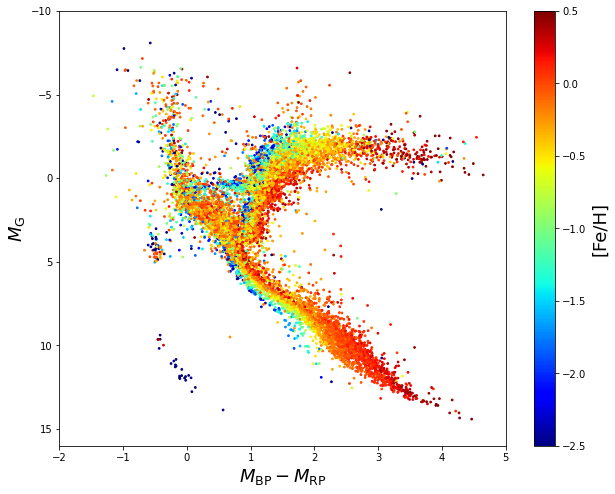

<hr>


## Student Name and ID:



## Date:

<hr>

In [5]:
import astropy.io.fits as fits

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams["savefig.dpi"] = 150
rcParams["figure.dpi"] = 150
rcParams["font.size"] = 15

# Stellar Types

In astronomy, stellar classification is the classification of stars based on their spectral characteristics. Electromagnetic radiation from the star is analyzed by splitting it with a prism or diffraction grating into a spectrum exhibiting the rainbow of colors interspersed with spectral lines. Each line indicates a particular chemical element or molecule, with the line strength indicating the abundance of that element. The strengths of the different spectral lines vary mainly due to the temperature of the photosphere, although in some cases there are true abundance differences. The spectral class of a star is a short code primarily summarizing the ionization state, giving an objective measure of the photosphere's temperature.

Most stars are currently classified under the Morgan–Keenan (MK) system using the letters O, B, A, F, G, K, and M, a sequence from the hottest (O type) to the coolest (M type).

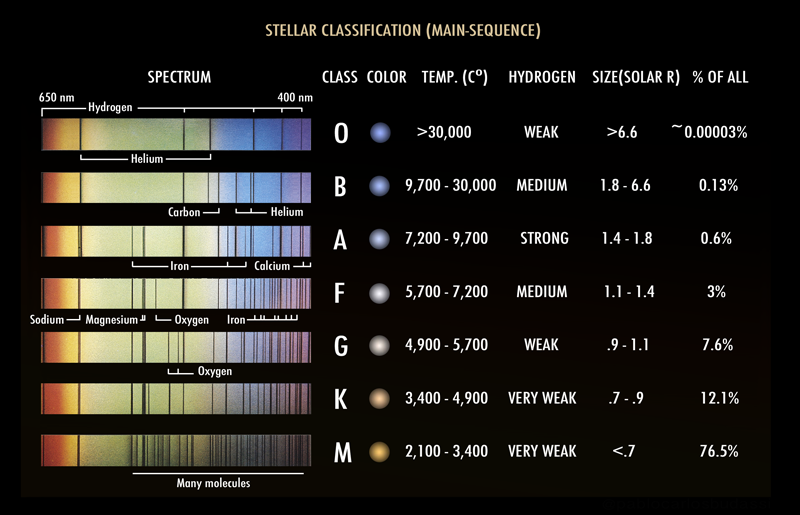

The fact that the Harvard classification of a star indicated its surface or photospheric temperature (or more precisely, its effective temperature) was not fully understood until after its development, though by the time the first Hertzsprung–Russell diagram was formulated (by 1914), this was generally suspected to be true.

Harvard astronomer Cecilia Payne then demonstrated that the O-B-A-F-G-K-M spectral sequence is actually a sequence in temperature.[19] Because the classification sequence predates our understanding that it is a temperature sequence, the placement of a spectrum into a given subtype, such as B3 or A7, depends upon (largely subjective) estimates of the strengths of absorption features in stellar spectra. As a result, these subtypes are not evenly divided into any sort of mathematically representable intervals.

# Reading in the MaStar Catalog

For this assignment, we will use the MaStar stellar spectral library. This is a catalog file with all the information derived from the spectra and a catalog file with all the spectra in them. 

MaStar is a stellar spectral library with a very comprehensive stellar parameter coverage, a large sample size, and high quality calibrations, using the same IFU instrument used by the MaNGA galaxies survey. An overview of the program and the first release of MaStar data are described by Yan et al. (2019, https://ui.adsabs.harvard.edu/abs/2019ApJ...883..175Y/abstract).

Read about the survey here:
https://www.sdss4.org/surveys/mastar/

And the example that this assignment is loosly based on here:
https://www.sdss4.org/dr15/mastar/mastar-tutorials/



In [9]:
import urllib.request
urllib.request.urlretrieve("https://data.sdss.org/sas/dr15/manga/spectro/mastar/v2_4_3/v1_0_2/mastarall-v2_4_3-v1_0_2.fits", "mastarall-v2_4_3.fits")

urllib.request.urlretrieve("https://data.sdss.org/sas/dr15/manga/spectro/mastar/v2_4_3/v1_0_2/mastar-goodspec-v2_4_3-v1_0_2.fits.gz", "mastar-goodspec-v2_4_3.fits")


KeyboardInterrupt: 

In [ ]:
mastarall = fits.open('./mastarall-v2_4_3.fits')
mastarcat = mastarall[1].data # I am making this shortcut because we may not have mrdfits installed

In [ ]:
mastarall.info()


In [ ]:
# this is the catalog with good stellar information
mastarcat.names


### Exercise 1 -- selecting all the stellar types.

Starting with the example for K-type stars, define a selection for each of the different types in the figure at the beginning of this assignment.

In [ ]:
ksel = np.logical_and(mastarcat["INPUT_TEFF"] > 3400 , mastarcat["INPUT_TEFF"] < 4900)

# or 

ksel = np.where( (mastarcat["INPUT_TEFF"] > 3400)&(mastarcat["INPUT_TEFF"] < 4900) )

# both work


### Exercise 2 -- plot surface gravity and temperature for each type

For each selection, plot the surface gravity ("INPUT_LOGG") against the effective temperature ("INPUT_TEFF") for each type of star.

In [1]:

# example plotting the ksel we defined earlier
plt.plot(mastarcat[ksel]["INPUT_LOGG"],mastarcat[ksel]["INPUT_TEFF"], 'C0.', label='K-stars')


# student work here


NameError: name 'plt' is not defined

### Exercise 3 -- Stellar Temperature and Surface Gravity

Does the surface gravity of a star depend on the stellar type? If I give you a surface gravity value, does it unambiguously define a stellar type?

*student written answer here*

### Exercise 4 -- Count the number of stars in each selection

For each stellar type selection, count the number of entries in *mastarcat* (hint: we use len() to count elements in lists etc.). Use the print command to print each stellar type selection's length. Organize them by the memnonic.

In [3]:
# student work here



### Exercise 5 -- Relative numbers

Looking at how many of each stellar type are present, which stellar types are absent? Which type is very rare?

*student written answer here*

### Exercise 6 -- Relative numbers

Can you think of the reason that M-dwarfs are 76% of all stars in the Milky Way but there are only 3 in MaStar?

*student written answer here*

# Unique ID numbers

Each MANGA object has an unique ID number in "MANGAID". We will now read in the spectum catalog and find our different stars in there and plot the spectra. 

In [200]:
# print out the first k-star's ID

kstars = mastarcat[ksel]

print(kstars[0]["MANGAID"])


27-1725


In [60]:
# reading in the spectral catalog
goodspec = fits.open("mastar-goodspec-v2_4_3.fits")[1].data


# Example -- Plot the first K-type star in MaStar

Below we ask for the MaStar visit where the ID is the same as the first one in the K-type selection. 

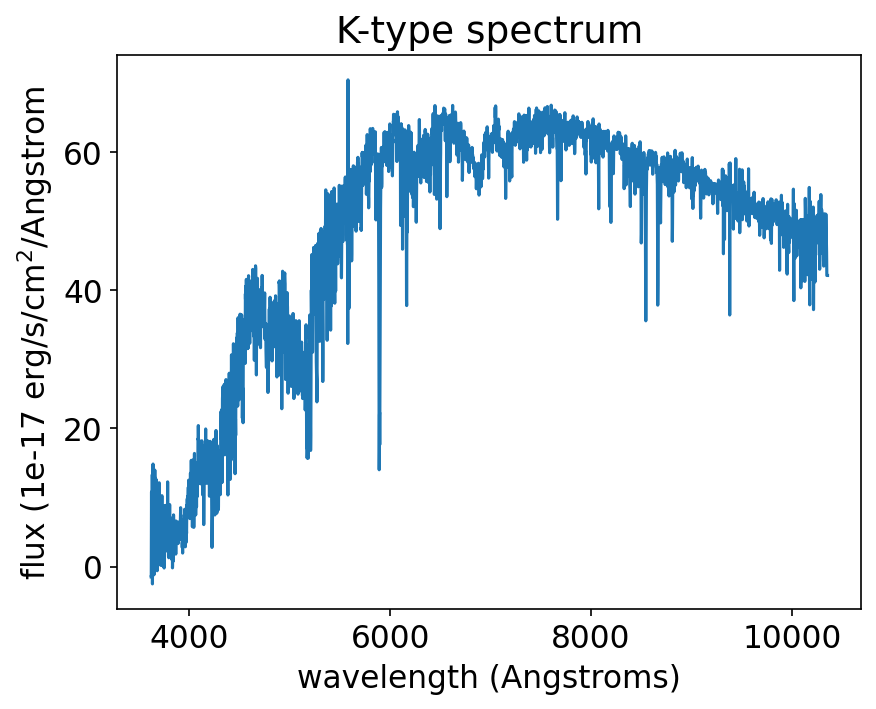

In [216]:
visits = goodspec["MANGAID"] == kstars[0]["MANGAID"]
wavelength = goodspec[visits]["WAVE"][0]
flux = goodspec[visits]["FLUX"][0]

plt.title('K-type spectrum')
plt.plot(wavelength,flux)
plt.ylabel("flux (1e-17 erg/s/cm$^2$/Angstrom")
plt.xlabel("wavelength (Angstroms)")
plt.show()

### Exercise 7 -- Plot all the other types of stars

Use the above example to plot all four most common stellar types. Make sure to label the axes and use label/legend trick to label the stellar types.

In [15]:
#student work here
# A-type

# F-type

# G-type

# K-type


### Exercise 8 -- Hydrogen line

Which stellar types have pronounced hydrogen absorbing features at 4861 and 6563 Angstroms ? 

*student written answer here*

### Exercise 9 -- M-type star

Plot one of the three M-type stars. 

In [17]:
# student work here


### Exercise 10 -- M-type star

What is the peak wavelength (approximately) for this M-dwarf? How does it compare to the temperature range for M-dwarfs? 

*student written answer here*

<hr>

INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]


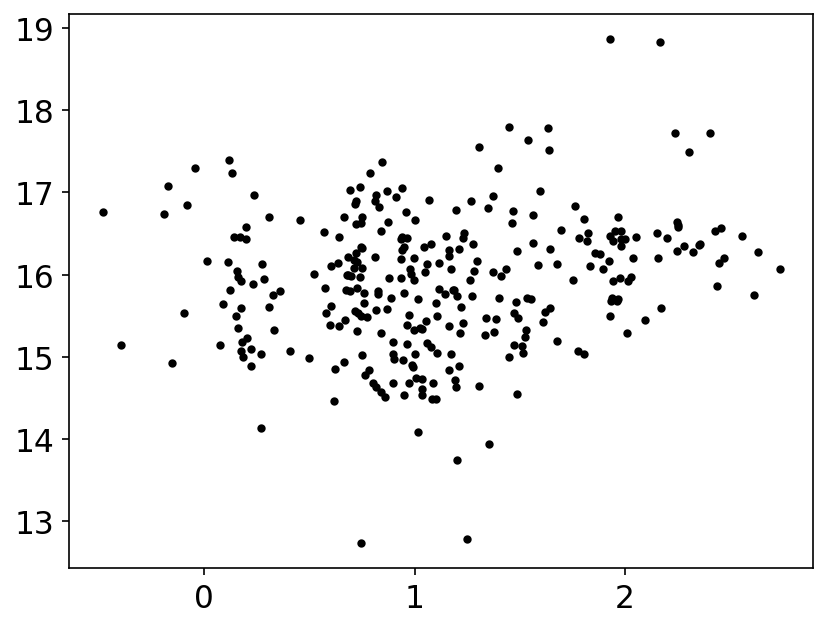

In [119]:
import astropy.units as u
from astropy.coordinates import SkyCoord
from astroquery.gaia import Gaia

def getGaia(data):
    m_bp = []
    m_rp = []
    for i in range(len(data)):
        coord = SkyCoord(ra=data["OBJRA"][i], dec=data["OBJDEC"][i], unit=(u.degree, u.degree), frame='icrs')
        width = u.Quantity(0.01, u.deg)
        height = u.Quantity(0.01, u.deg)
        r = Gaia.query_object_async(coordinate=coord, width=width, height=height)
        # r.pprint(max_lines=12, max_width=130)
        m_bp.append(r['phot_bp_mean_mag'][0])
        m_rp.append(r['phot_rp_mean_mag'][0])
    m_bp = np.asarray(m_bp)
    m_rp = np.asarray(m_rp)
    return m_bp, m_rp

m_bp, m_rp = getGaia(mastarall[1].data[0:300])

plt.plot(m_bp-m_rp, m_bp,  'k.')


In [82]:
r['phot_bp_mean_mag'][0]

17.513103

In [78]:
r[0]

dist,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pm,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,nu_eff_used_in_astrometry,pseudocolour,pseudocolour_error,ra_pseudocolour_corr,dec_pseudocolour_corr,parallax_pseudocolour_corr,pmra_pseudocolour_corr,pmdec_pseudocolour_corr,astrometric_matched_transits,visibility_periods_used,astrometric_sigma5d_max,matched_transits,new_matched_transits,matched_transits_removed,ipd_gof_harmonic_amplitude,ipd_gof_harmonic_phase,ipd_frac_multi_peak,ipd_frac_odd_win,ruwe,scan_direction_strength_k1,scan_direction_strength_k2,scan_direction_strength_k3,scan_direction_strength_k4,scan_direction_mean_k1,scan_direction_mean_k2,scan_direction_mean_k3,scan_direction_mean_k4,duplicated_source,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_n_obs,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_bp_n_contaminated_transits,phot_bp_n_blended_transits,phot_rp_n_contaminated_transits,phot_rp_n_blended_transits,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_method_used,rv_nb_transits,rv_nb_deblended_transits,rv_visibility_periods_used,rv_expected_sig_to_noise,rv_renormalised_gof,rv_chisq_pvalue,rv_time_duration,rv_amplitude_robust,rv_template_teff,rv_template_logg,rv_template_fe_h,rv_atm_param_origin,vbroad,vbroad_error,vbroad_nb_transits,grvs_mag,grvs_mag_error,grvs_mag_nb_transits,rvs_spec_sig_to_noise,phot_variable_flag,l,b,ecl_lon,ecl_lat,in_qso_candidates,in_galaxy_candidates,non_single_star,has_xp_continuous,has_xp_sampled,has_rvs,has_epoch_photometry,has_epoch_rv,has_mcmc_gspphot,has_mcmc_msc,in_andromeda_survey,classprob_dsc_combmod_quasar,classprob_dsc_combmod_galaxy,classprob_dsc_combmod_star,teff_gspphot,teff_gspphot_lower,teff_gspphot_upper,logg_gspphot,logg_gspphot_lower,logg_gspphot_upper,mh_gspphot,mh_gspphot_lower,mh_gspphot_upper,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,azero_gspphot,azero_gspphot_lower,azero_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,ebpminrp_gspphot,ebpminrp_gspphot_lower,ebpminrp_gspphot_upper,libname_gspphot
,,,,,yr,deg,mas,deg,mas,mas,mas,,mas / yr,mas / yr,mas / yr,mas / yr,mas / yr,,,,,,,,,,,,,,,,,mas,,,,1 / um,1 / um,1 / um,,,,,,,,mas,,,,,deg,,,,,,,,deg,deg,deg,deg,,,electron / s,electron / s,,mag,,electron / s,electron / s,,mag,,electron / s,electron / s,,mag,,,,,,,mag,mag,mag,km / s,km / s,,,,,,,,d,km / s,K,log(cm.s**-2),dex,,km / s,km / s,,mag,mag,,,,deg,deg,deg,deg,,,,,,,,,,,,,,,K,K,K,log(cm.s**-2),log(cm.s**-2),log(cm.s**-2),dex,dex,dex,pc,pc,pc,mag,mag,mag,mag,mag,mag,mag,mag,mag,
float64,int64,object,int64,int64,float64,float64,float32,float64,float32,float64,float32,float32,float32,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,int16,float32,float32,float32,float32,int16,bool,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,float32,int16,int16,int16,float32,float32,int16,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,bool,int16,float64,float32,float32,float32,int16,float64,float32,float32,float32,int16,float64,float32,float32,float32,float32,int16,int16,int16,int16,int16,float32,float32,float32,float32,float32,int16,int16,int16,int16,float32,float32,float32,float32,float32,float32,fl

In [87]:
len(mastarall[1].data["OBJRA"])

3326

In [93]:
m_bp = np.asarray(m_bp)
m_rp = np.asarray(m_rp)

(19.0, 13.0)

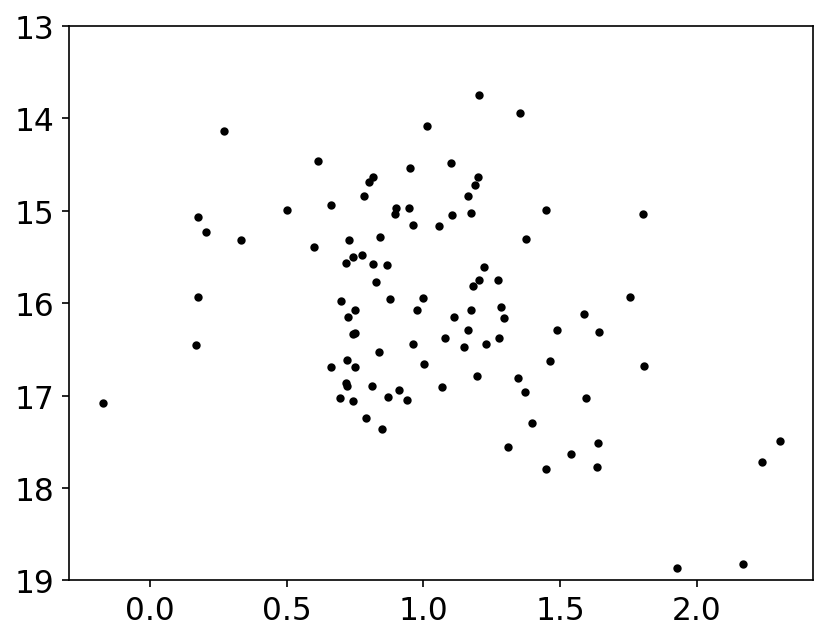

In [103]:
plt.plot(m_bp-m_rp, m_bp,  'k.')
plt.ylim( (19,13) )